### Chap 1.4.13 Hough Line Transform

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

#### Hough Tranform in OpenCV

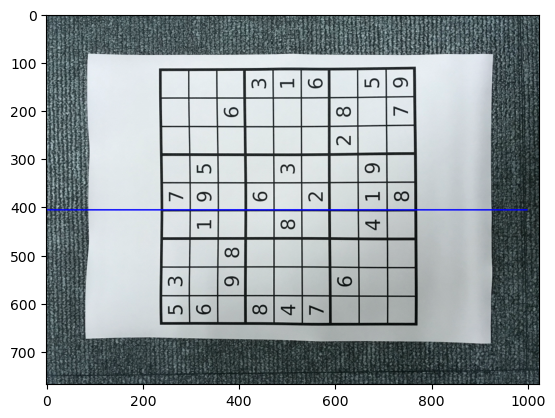

In [21]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
   a = np.cos(theta)
   b = np.sin(theta)
   x0 = a*rho
   y0 = b*rho
   x1 = int(x0 + 1000*(-b))
   y1 = int(y0 + 1000*(a))
   x2 = int(x0- 1000*(-b))
   y2 = int(y0- 1000*(a))

   cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

plt.imshow(img)


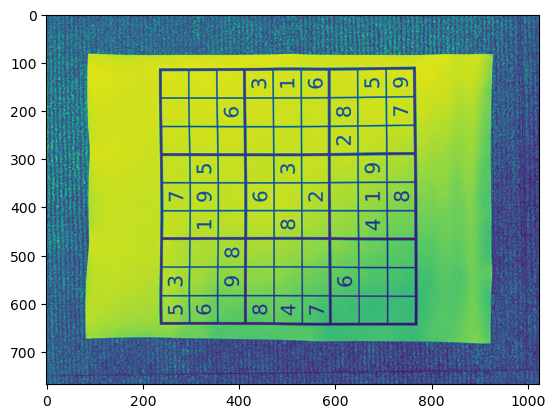

In [22]:
plt.imshow(gray)

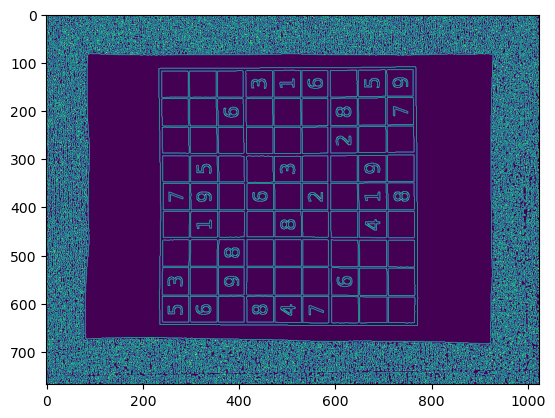

In [23]:
plt.imshow(edges)

In [24]:
lines

array([[[ 406.       ,    1.5707964]],

       [[ 409.       ,    1.5707964]],

       [[  84.       ,    1.5707964]],

       ...,

       [[ 129.       ,    2.3561945]],

       [[-908.       ,    2.9496064]],

       [[  46.       ,    2.9496064]]], dtype=float32)

In [25]:
lines.shape

(1755, 1, 2)

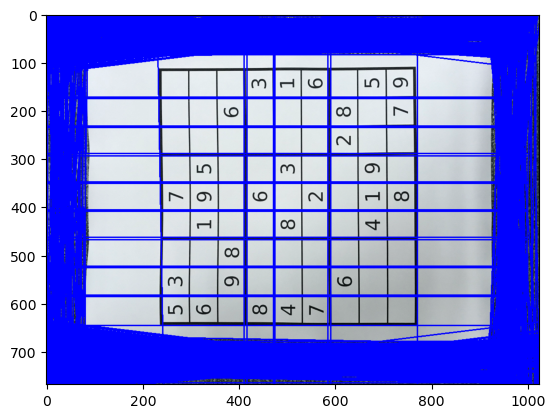

In [52]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200) 

for i in range(500):
   for rho,theta in lines[i]:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0- 1000*(-b))
      y2 = int(y0- 1000*(a))
      cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines3.jpg',img)

plt.imshow(img)

#### Probabilistic Hough Transform

In [61]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [62]:
lines.shape

(376, 1, 4)

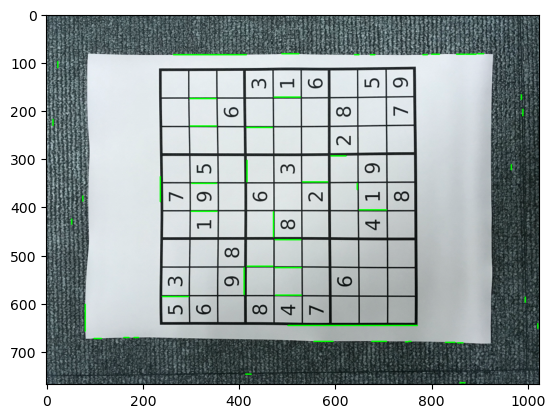

In [63]:
for i in range(50):
   for x1,y1,x2,y2 in lines[i]:
      cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
   
cv2.imwrite('houghlines5.jpg',img)

plt.imshow(img)


In [5]:
def nothing(x):
   pass

In [6]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100 
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)


In [7]:
minLineLength = 100
maxLineGap = 10
lineNums = 10
# Create a black image, a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('minLineLength','image',0,500,nothing)
cv2.createTrackbar('maxLineGap','image',0,500,nothing)
cv2.createTrackbar('lineNums','image',0,100,nothing)
cv2.setTrackbarPos('minLineLength','image',minLineLength)
cv2.setTrackbarPos('maxLineGap','image',maxLineGap)
cv2.setTrackbarPos('lineNums','image',lineNums)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    minLineLength = cv2.getTrackbarPos('minLineLength','image')
    maxLineGap = cv2.getTrackbarPos('maxLineGap','image')
    lineNums = cv2.getTrackbarPos('lineNums', 'image')
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    lineNum = min(lineNums, lines.shape[0])

    for i in range(lineNum):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'
